<a href="https://colab.research.google.com/github/jnsbrdbr/andrew-ng/blob/master/test10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from decimal import Decimal
from math import*
from sklearn.datasets import load_digits
from scipy.spatial.distance import pdist
from sklearn.manifold._t_sne import _joint_probabilities
import sklearn.manifold
from sklearn.manifold import TSNE
from scipy import linalg
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
from sklearn.manifold import TSNE
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 10)
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/test/test10.csv"
data = pd.read_csv(path)

In [ ]:
type(data)

pandas.core.frame.DataFrame

part 1

In [ ]:
data

,src,dst
0,1,2
1,1,4
2,3,4
3,3,5
4,5,6
5,5,10
6,5,12
7,5,14


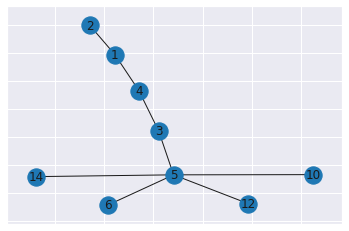

In [ ]:
import networkx as nx
g = nx.from_pandas_edgelist(data, "src","dst")
nx.draw_networkx(g)

data must be in order

In [ ]:
#adjucency matrix without chunking
adjc = pd.crosstab(data.src, data.dst)
idx = adjc.columns.union(adjc.index)
up_adj_mtx = adjc.reindex(index = idx, columns=idx, fill_value=0)


In [ ]:
print(up_adj_mtx)

    1   2   3   4   5   6   10  12  14
1    0   1   0   1   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0
3    0   0   0   1   1   0   0   0   0
4    0   0   0   0   0   0   0   0   0
5    0   0   0   0   0   1   1   1   1
6    0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0
12   0   0   0   0   0   0   0   0   0
14   0   0   0   0   0   0   0   0   0


In [ ]:
adj_mtx=up_adj_mtx
for i in adj_mtx:
  for j in adj_mtx:
    if(adj_mtx[i][j]!=0):
       adj_mtx[j][i]=adj_mtx[i][j]

In [ ]:
adj_mtx=adj_mtx.to_numpy()
print(adj_mtx)

[[0 1 0 1 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0]
 [1 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0 0]]


In [ ]:
#adjucency matrix with chunking

#for data in pd.read_csv(path, chunksize=2):
#    print (data)
#    data1 = pd.crosstab(data.src, data.dst)
#    idx = data1.columns.union(data1.index)
#    data2 = data1.reindex(index = idx, columns=idx, fill_value=0)
#    print(data2)

part2

common firend(CF):one of the measure for similarity in social networks is the number of firends,shared.given the sicial network G and two nodes u and v all vertics that are on a path wih the length of two between these two nodes are common firends of the nodes.
در مربع ماتریس مجاورت درایه"آی جی ام"و غیر واقع بر قطر اصلی مربع ماتریس مجاورت نشان دهنده تعدا مسیر به طول دو بین دو راس آی و جی هست

In [ ]:
#common firend

CF=np.dot(adj_mtx,adj_mtx) #matrix multiplication
#print(CF,'\n')

CF=CF - np.diag(np.diag(CF))#matrix off_diagonal
print(CF)

[[0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1]
 [0 0 1 0 0 1 0 1 1]
 [0 0 1 0 0 1 1 0 1]
 [0 0 1 0 0 1 1 1 0]]


In [ ]:
#total_firend

adjc = pd.crosstab(data.src, data.dst)
idx = adjc.columns.union(adjc.index)
up_adj_mtx = adjc.reindex(index = idx, columns=idx, fill_value=0)
up_adj_mtx=up_adj_mtx.to_numpy()
#print(up_adj_mtx)

In [ ]:
i=up_adj_mtx.shape[0]
c=np.zeros(shape=(i,i))
for i in range(0,up_adj_mtx.shape[0]):
  for j in range(0,up_adj_mtx.shape[1]):
     if i==j:
       c[i,j]=(sum(up_adj_mtx[i,:])+sum(up_adj_mtx[:,j]))
#print(c)

In [ ]:
i=c.shape[0]
TF=np.zeros(shape=(i,i))
for i in range(0,c.shape[0]):
  for j in range(0,c.shape[1]):
    TF[i,j]=c[i,i]+c[j,j]
TF=TF - np.diag(np.diag(TF))#matrix off_diagonal
print(TF)

[[0. 3. 4. 4. 7. 3. 3. 3. 3.]
 [3. 0. 3. 3. 6. 2. 2. 2. 2.]
 [4. 3. 0. 4. 7. 3. 3. 3. 3.]
 [4. 3. 4. 0. 7. 3. 3. 3. 3.]
 [7. 6. 7. 7. 0. 6. 6. 6. 6.]
 [3. 2. 3. 3. 6. 0. 2. 2. 2.]
 [3. 2. 3. 3. 6. 2. 0. 2. 2.]
 [3. 2. 3. 3. 6. 2. 2. 0. 2.]
 [3. 2. 3. 3. 6. 2. 2. 2. 0.]]


In [ ]:
#jaccard_similarity

i=adj_mtx.shape[0]
jaccard_similarity=np.zeros(shape=(i,i))
for i in range(0,jaccard_similarity.shape[0]):
  for j in range(0,jaccard_similarity.shape[1]):
    if CF[i,j]==0 or TF[i,j]==0:
       jaccard_similarity[i,j]==0
    else:
       #jaccard_similarity[i,j]=(CF[i,j]/TF[i,j])
       jaccard_similarity[i,j]=np.divide(CF[i,j],TF[i,j])
       jaccard_similarity=np.round(jaccard_similarity,2)

jaccard_similarity=jaccard_similarity - np.diag(np.diag(jaccard_similarity))#matrix off_diagonal
print(jaccard_similarity)


[[0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.33 0.33 0.33 0.33]
 [0.   0.33 0.   0.   0.14 0.   0.   0.   0.  ]
 [0.   0.   0.   0.14 0.   0.   0.   0.   0.  ]
 [0.   0.   0.33 0.   0.   0.   0.5  0.5  0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.   0.5  0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.5  0.   0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.5  0.5  0.  ]]


In [ ]:
#cosine_similarity

i=up_adj_mtx.shape[0]
cosine_similarity1=np.zeros(shape=(i,i))
for i in range(0,cosine_similarity1.shape[0]):
  for j in range(0,cosine_similarity1.shape[1]):
       cosine_similarity1[i,j]=sqrt((c[i,i])*(c[j,j]))

#print(cosine_similarity1)

In [ ]:
i=adj_mtx.shape[0]
cosine_similarity=np.zeros(shape=(i,i))
for i in range(0,cosine_similarity.shape[0]):
  for j in range(0,cosine_similarity.shape[1]):
    if CF[i,j]==0 or cosine_similarity1[i,j]==0:
       cosine_similarity[i,j]==0
    else:
       cosine_similarity[i,j]=np.divide(CF[i,j],cosine_similarity1[i,j])
       cosine_similarity=np.round(cosine_similarity,2)

cosine_similarity=cosine_similarity - np.diag(np.diag(cosine_similarity))#matrix off_diagonal
print(cosine_similarity)

[[0.   0.   0.5  0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.71 0.   0.   0.   0.   0.  ]
 [0.5  0.   0.   0.   0.   0.71 0.71 0.71 0.71]
 [0.   0.71 0.   0.   0.32 0.   0.   0.   0.  ]
 [0.   0.   0.   0.32 0.   0.   0.   0.   0.  ]
 [0.   0.   0.71 0.   0.   0.   1.   1.   1.  ]
 [0.   0.   0.71 0.   0.   1.   0.   1.   1.  ]
 [0.   0.   0.71 0.   0.   1.   1.   0.   1.  ]
 [0.   0.   0.71 0.   0.   1.   1.   1.   0.  ]]


In [ ]:
cosine_similarity = pairwise_distances(up_adj_mtx, metric='cosine')
print(cosine_similarity)

[[0.  1.  0.5 1.  1.  1.  1.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  1.  1.  1. ]
 [0.5 1.  0.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  0.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  0.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  0.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  0.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  0.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  0. ]]


In [ ]:
#L1_norm()
 
i=up_adj_mtx.shape[0]
L1_norm1=np.zeros(shape=(i,i))
for i in range(0,L1_norm1.shape[0]):
  for j in range(0,L1_norm1.shape[1]):
       L1_norm1[i,j]=(c[i,i])*(c[j,j])

#print(L1_norm1)

In [ ]:
i=adj_mtx.shape[0]
L1_norm=np.zeros(shape=(i,i))
for i in range(0,L1_norm.shape[0]):
  for j in range(0,L1_norm.shape[1]):
    if CF[i,j]==0 or L1_norm1[i,j]==0:
       L1_norm[i,j]==0
    else:
       #jaccard_similarity[i,j]=(CF[i,j]/TF[i,j])
       L1_norm[i,j]=np.divide(CF[i,j],L1_norm1[i,j])
       L1_norm=np.round(L1_norm,2)

L1_norm=L1_norm - np.diag(np.diag(L1_norm))#matrix off_diagonal
print(L1_norm)

[[0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.5  0.5  0.5  0.5 ]
 [0.   0.5  0.   0.   0.1  0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   1.   1.   1.  ]
 [0.   0.   0.5  0.   0.   1.   0.   1.   1.  ]
 [0.   0.   0.5  0.   0.   1.   1.   0.   1.  ]
 [0.   0.   0.5  0.   0.   1.   1.   1.   0.  ]]


In [ ]:
#edge_weight_measure

i=up_adj_mtx.shape[0]
ewm=np.zeros(shape=(i,i))
for i in range(0,ewm.shape[0]):
  for j in range(0,ewm.shape[1]):
     if i==j:
       ewm[i,j]=1/sqrt(1+c[i,i])
       ewm=np.round(ewm)

#print(ewm)

In [ ]:
i=up_adj_mtx.shape[0]
wsum=np.zeros(shape=(i,i))
for i in range(0,wsum.shape[0]):
  for j in range(0,wsum.shape[1]):
    wsum[i,j]=ewm[i,i]+ewm[j,j]
    #wsum=np.round(wsum)
print(wsum)

[[2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]]


In [ ]:
i=up_adj_mtx.shape[0]
wmul=np.zeros(shape=(i,i))
for i in range(0,wmul.shape[0]):
  for j in range(0,wmul.shape[1]):
    wmul[i,j]=ewm[i,i]*ewm[j,j]
    wmul=np.round(wmul,2)
print(wmul)

[[1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]]


t_sne section

actual data

In [ ]:
print('CF:','\n',CF, '\n')
print('TF:','\n',TF, '\n ')

CF: 
 [[0 0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [1 0 0 0 0 1 1 1 1]
 [0 1 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 1 1]
 [0 0 1 0 0 1 0 1 1]
 [0 0 1 0 0 1 1 0 1]
 [0 0 1 0 0 1 1 1 0]] 

TF: 
 [[0. 3. 4. 4. 7. 3. 3. 3. 3.]
 [3. 0. 3. 3. 6. 2. 2. 2. 2.]
 [4. 3. 0. 4. 7. 3. 3. 3. 3.]
 [4. 3. 4. 0. 7. 3. 3. 3. 3.]
 [7. 6. 7. 7. 0. 6. 6. 6. 6.]
 [3. 2. 3. 3. 6. 0. 2. 2. 2.]
 [3. 2. 3. 3. 6. 2. 0. 2. 2.]
 [3. 2. 3. 3. 6. 2. 2. 0. 2.]
 [3. 2. 3. 3. 6. 2. 2. 2. 0.]] 
 


In [ ]:
print('jaccard_similarity:','\n',jaccard_similarity, '\n ')
print('cosine_similarity:','\n',cosine_similarity, '\n ')

jaccard_similarity: 
 [[0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.33 0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.33 0.33 0.33 0.33]
 [0.   0.33 0.   0.   0.14 0.   0.   0.   0.  ]
 [0.   0.   0.   0.14 0.   0.   0.   0.   0.  ]
 [0.   0.   0.33 0.   0.   0.   0.5  0.5  0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.   0.5  0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.5  0.   0.5 ]
 [0.   0.   0.33 0.   0.   0.5  0.5  0.5  0.  ]] 
 
cosine_similarity: 
 [[0.  1.  0.5 1.  1.  1.  1.  1.  1. ]
 [1.  0.  1.  1.  1.  1.  1.  1.  1. ]
 [0.5 1.  0.  1.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  0.  1.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  0.  1.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  0.  1.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  0.  1.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  0.  1. ]
 [1.  1.  1.  1.  1.  1.  1.  1.  0. ]] 
 


In [ ]:
print('L1_norm:','\n',L1_norm, '\n ')
print('wsum:','\n',wsum, '\n ')
print('wmul:','\n',wmul, '\n ')

L1_norm: 
 [[0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.5  0.   0.   0.   0.   0.  ]
 [0.25 0.   0.   0.   0.   0.5  0.5  0.5  0.5 ]
 [0.   0.5  0.   0.   0.1  0.   0.   0.   0.  ]
 [0.   0.   0.   0.1  0.   0.   0.   0.   0.  ]
 [0.   0.   0.5  0.   0.   0.   1.   1.   1.  ]
 [0.   0.   0.5  0.   0.   1.   0.   1.   1.  ]
 [0.   0.   0.5  0.   0.   1.   1.   0.   1.  ]
 [0.   0.   0.5  0.   0.   1.   1.   1.   0.  ]] 
 
wsum: 
 [[2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]
 [2. 2. 2. 2. 1. 2. 2. 2. 2.]] 
 
wmul: 
 [[1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 1. 1.]
 [1. 1. 1. 1. 0. 1. 1. 

In [ ]:
euclidean_distances = pairwise_distances(up_adj_mtx, metric='euclidean', squared=True)
print('euclidean_distances:','\n',euclidean_distances, '\n ')

euclidean_distances: 
 [[0. 2. 2. 2. 6. 2. 2. 2. 2.]
 [2. 0. 2. 0. 4. 0. 0. 0. 0.]
 [2. 2. 0. 2. 6. 2. 2. 2. 2.]
 [2. 0. 2. 0. 4. 0. 0. 0. 0.]
 [6. 4. 6. 4. 0. 4. 4. 4. 4.]
 [2. 0. 2. 0. 4. 0. 0. 0. 0.]
 [2. 0. 2. 0. 4. 0. 0. 0. 0.]
 [2. 0. 2. 0. 4. 0. 0. 0. 0.]
 [2. 0. 2. 0. 4. 0. 0. 0. 0.]] 
 


t_sne implementation

In [ ]:
CF_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(CF)
CF_embedded.shape

(9, 1)

In [ ]:
print('CF_embedded:','\n',CF_embedded, '\n ')

CF_embedded: 
 [[ 176.15851 ]
 [ 161.26678 ]
 [ -90.07316 ]
 [-153.0869  ]
 [-235.8407  ]
 [  64.46424 ]
 [ -48.570732]
 [  95.29342 ]
 [  96.22285 ]] 
 


In [ ]:
TF_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(TF)
TF_embedded.shape

(9, 1)

In [ ]:
print('TF_embedded:','\n',TF_embedded, '\n ')

TF_embedded: 
 [[ -6.184548]
 [  8.55129 ]
 [ 67.92217 ]
 [ 37.229626]
 [-40.3258  ]
 [ 51.96888 ]
 [ 22.887758]
 [-21.907274]
 [ 86.40291 ]] 
 


In [ ]:
jaccard_similarity_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(jaccard_similarity)
jaccard_similarity_embedded.shape

(9, 1)

In [ ]:
print('jaccard_similarity_embedded:','\n',jaccard_similarity_embedded, '\n ')

jaccard_similarity_embedded: 
 [[-27.965124 ]
 [-11.790811 ]
 [-17.252148 ]
 [ 10.414379 ]
 [ 22.188656 ]
 [ 32.360672 ]
 [ -3.4787133]
 [  9.436594 ]
 [-70.72975  ]] 
 


In [ ]:
cosine_similarity_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(cosine_similarity)
cosine_similarity_embedded.shape

(9, 1)

In [ ]:
print('cosine_similarity_embedded:','\n',cosine_similarity_embedded, '\n ')

cosine_similarity_embedded: 
 [[ -44.66767 ]
 [   2.570412]
 [ 211.97458 ]
 [-145.22267 ]
 [-206.12373 ]
 [  49.793793]
 [ -93.29548 ]
 [  98.34949 ]
 [ 150.95416 ]] 
 


In [ ]:
L1_norm_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(L1_norm)
L1_norm_embedded.shape

(9, 1)

In [ ]:
print('L1_norm_embedded:','\n',L1_norm_embedded, '\n ')

L1_norm_embedded: 
 [[  5.6641808]
 [ 21.485052 ]
 [-71.6468   ]
 [-32.9966   ]
 [-20.63123  ]
 [ -7.9382415]
 [-45.25633  ]
 [-58.0473   ]
 [-87.61526  ]] 
 


In [ ]:
wsum_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(wsum)
wsum_embedded.shape

(9, 1)

In [ ]:
print('wsum_embedded:','\n',wsum_embedded, '\n ')

wsum_embedded: 
 [[ -22.148314]
 [ -84.74321 ]
 [ 102.67986 ]
 [-150.07278 ]
 [ 169.18434 ]
 [ 325.71024 ]
 [-225.07312 ]
 [  39.848576]
 [ 240.68536 ]] 
 


In [ ]:
wmul_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(wmul)
wmul_embedded.shape

(9, 1)

In [ ]:
print('wmul_embedded:','\n',wmul_embedded, '\n ')

wmul_embedded: 
 [[ 172.63329 ]
 [ 323.63724 ]
 [-231.9089  ]
 [ 108.08074 ]
 [  45.30711 ]
 [ -17.480188]
 [-151.0705  ]
 [ 242.56874 ]
 [ -82.09821 ]] 
 


In [ ]:
euclidean_distances_embedded = TSNE(n_components=1, learning_rate='auto',
                   init='random').fit_transform(euclidean_distances)
euclidean_distances_embedded.shape

(9, 1)

In [ ]:
print('euclidean_distances_embedded:','\n',euclidean_distances_embedded, '\n ')

euclidean_distances_embedded: 
 [[ 198.56268 ]
 [  48.338066]
 [ 120.456665]
 [ -91.96891 ]
 [-331.51855 ]
 [ -21.807232]
 [-241.22377 ]
 [-164.16545 ]
 [ 289.08307 ]] 
 


concatinating the matrices

In [ ]:
#concatinating the matrices
final_mtx1=np.concatenate((CF_embedded, TF_embedded,jaccard_similarity_embedded,
                          cosine_similarity_embedded,L1_norm_embedded,wsum_embedded,wmul_embedded,
                          euclidean_distances_embedded), axis=1)

In [ ]:
#making the matrix n*n
n=8
final_mtx=np.zeros(shape=(n,n))
for i in range(0,final_mtx.shape[0]):
  for j in range(0,final_mtx.shape[1]):
    final_mtx[i][j]=final_mtx1[i][j]
print(np.round(final_mtx,2))

[[ 176.16   -6.18  -27.97  -44.67    5.66  -22.15  172.63  198.56]
 [ 161.27    8.55  -11.79    2.57   21.49  -84.74  323.64   48.34]
 [ -90.07   67.92  -17.25  211.97  -71.65  102.68 -231.91  120.46]
 [-153.09   37.23   10.41 -145.22  -33.   -150.07  108.08  -91.97]
 [-235.84  -40.33   22.19 -206.12  -20.63  169.18   45.31 -331.52]
 [  64.46   51.97   32.36   49.79   -7.94  325.71  -17.48  -21.81]
 [ -48.57   22.89   -3.48  -93.3   -45.26 -225.07 -151.07 -241.22]
 [  95.29  -21.91    9.44   98.35  -58.05   39.85  242.57 -164.17]]
